In [1]:
#import plotly package
import plotly.express as px
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [27]:
df= pd.read_csv('../data/all_counties_states_mobility.csv', low_memory=False)

In [4]:
df.head()

,Unnamed: 0,country_code,state,date,county,mobility,percent_change,retail_and_recreation,grocery_and_pharmacy,parks,...,hospitalizedIncrease,death,deathIncrease,recovered,total,date_start,date_end,fips_y,county_cases,county_deaths
0,0,US,Alabama,2020-02-15,NaN,retail_and_recreation,5,5,2,39,...,0,0,0,0,0,April 4,April 30,0,0,0
1,1,US,Alabama,2020-02-15,Autauga,retail_and_recreation,5,5,7,0,...,0,0,0,0,0,April 4,April 30,0,0,0
2,2,US,Alabama,2020-02-15,Baldwin,retail_and_recreation,17,17,12,55,...,0,0,0,0,0,April 4,April 30,0,0,0
3,3,US,Alabama,2020-02-15,Barbour,retail_and_recreation,5,5,-2,0,...,0,0,0,0,0,April 4,April 30,0,0,0
4,4,US,Alabama,2020-02-15,Bibb,retail_and_recreation,14,14,10,0,...,0,0,0,0,0,April 4,April 30,0,0,0


# How have mobility changed in Alabama state during Covid-19

In [22]:
#filter to Alabama without counties
df_alabama_only = df.loc[(df["state"] == "Alabama") & (df["county"].isna())]

In [24]:
df_alabama_only.shape

(672, 31)

In [5]:
#filter to Alabama with out counties
#df_alabama= df.query("state == 'Alabama'")
#df_alabama = df[df['state'] == "Alabama"]
#df_alabama_only = df_alabama[df_alabama['county'].isna()] 

In [7]:
df_alabama_only.columns

Index(['Unnamed: 0', 'country_code', 'state', 'date', 'county', 'mobility',
       'percent_change', 'retail_and_recreation', 'grocery_and_pharmacy',
       'parks', 'transit_stations', 'workplaces', 'residential', 'fips_x',
       'positive', 'positiveIncrease', 'negative', 'negativeIncrease',
       'totalTestResults', 'totalTestResultsIncrease', 'hospitalizedCurrently',
       'hospitalizedIncrease', 'death', 'deathIncrease', 'recovered', 'total',
       'date_start', 'date_end', 'fips_y', 'county_cases', 'county_deaths'],
      dtype='object')

In [8]:
#Create a new dataframe where selecting only the plotting coloumns
df_line= df_alabama_only[[                 'date',
                          'retail_and_recreation',
                           'grocery_and_pharmacy',
                                          'parks',
                               'transit_stations',
                                     'workplaces',
                                    'residential',
                          'date_start',
                          'date_end'
                         ]]

In [9]:
#set date column as the index to used it as the base x axis in the line plot
df_line= df_line.set_index('date')

In [10]:
df_line.head()

,retail_and_recreation,grocery_and_pharmacy,parks,transit_stations,workplaces,residential,date_start,date_end
date,,,,,,,,
2020-02-15,5,2,39,7,2,-1,April 4,April 30
2020-02-15,5,2,39,7,2,-1,April 4,April 30
2020-02-15,5,2,39,7,2,-1,April 4,April 30
2020-02-15,5,2,39,7,2,-1,April 4,April 30
2020-02-15,5,2,39,7,2,-1,April 4,April 30


Text(0, 0.5, 'Percent change')

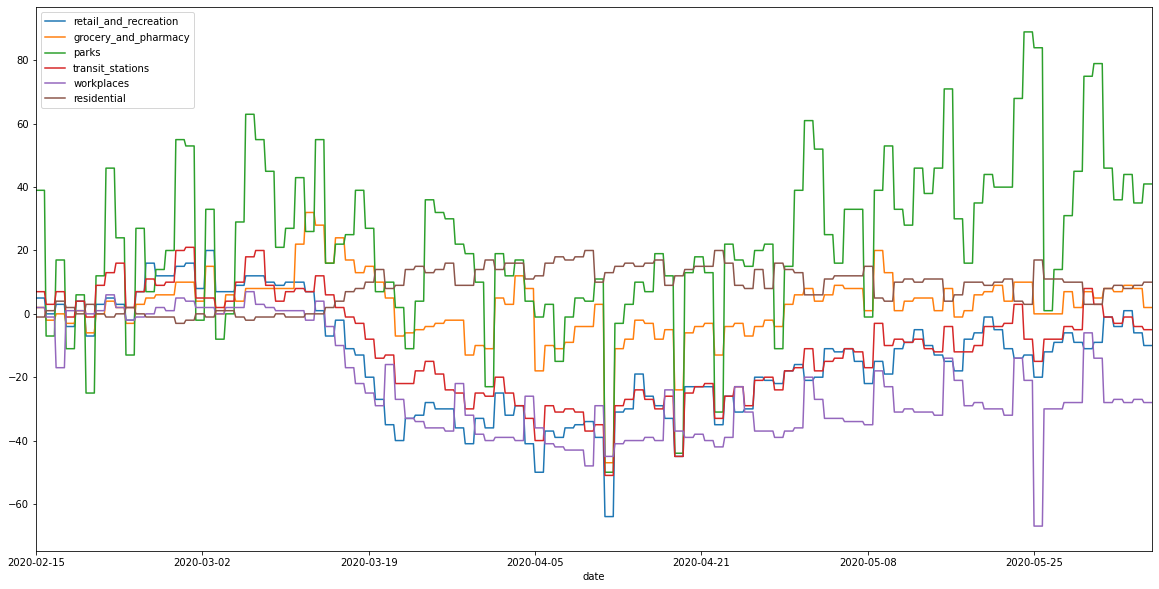

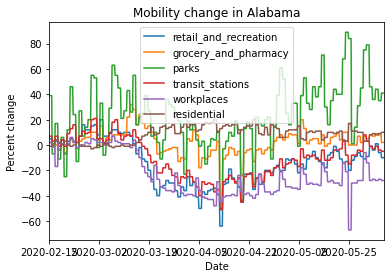

In [11]:
df_line.plot(figsize=(20,10)) 
df_line.plot.line()
plt.title('Mobility change in Alabama')
plt.xlabel('Date')
plt.ylabel('Percent change')
#plt.show()

In [55]:
#use ploty to make nice line plot
fig = px.line(df_alabama_only,
              x= 'date',
              y= "percent_change",
              color="mobility",
              line_shape="spline",
              title='Mobility percent change in the state Alabama ')
fig.add_annotation(
            x=df_alabama_only['date'],
            y=df_alabama_only['date_start'],
            text="dict Text")
fig.show()

In [59]:
alabama_only = df_alabama_only[['date', 'positiveIncrease','totalTestResultsIncrease', 'date_start', 'date_end' ]]

In [33]:
alabama_only['percent_positive_test']= (alabama_only['positiveIncrease'] / alabama_only['totalTestResultsIncrease']) *100

C:\Users\arikh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [34]:
alabama_only.tail()

,date,positiveIncrease,totalTestResultsIncrease,daily_positive_percent,percent_positive_test
43958,2020-06-05,315,4174,7.546718,7.546718
44026,2020-06-05,315,4174,7.546718,7.546718
44094,2020-06-05,315,4174,7.546718,7.546718
44162,2020-06-05,315,4174,7.546718,7.546718
44230,2020-06-05,315,4174,7.546718,7.546718


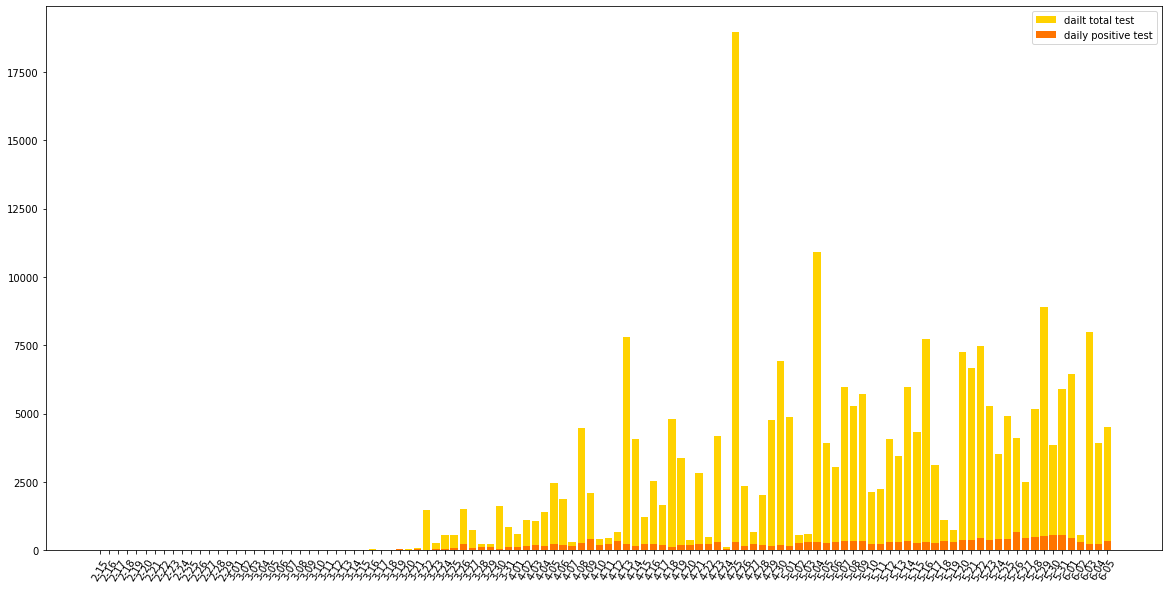

In [74]:
#stacked bar chart by date for positiveIncrease and totalTestResultsIncrease


plt.figure(figsize = (20, 10))

plt.bar(alabama_only['date'].str[6:10],
        alabama_only['totalTestResultsIncrease'],
        bottom=alabama_only['positiveIncrease'],
        label='dailt total test',color='#FFD200')

plt.bar(alabama_only['date'].str[6:10],
        alabama_only['positiveIncrease'],
        label = 'daily positive test',
        color='#FF7400')
plt.xticks(rotation = 60);


plt.legend()

plt.show()

In [47]:
fig = px.scatter(alabama_only,
              x= 'date', 
              y="percent_positive_test",
              #color="mobility",
              title='percent positive test in the state of Alabama'
                )

fig.show()

In [54]:
animals=['giraffes', 'orangutans', 'monkeys']

fig = go.Figure(data=[
    go.Bar(name='daily positive test', x=alabama_only['date'],
                          y=alabama_only['positiveIncrease'],
                          marker_color='rgb(150, 50, 50)'),
    go.Bar(name='daily total test', x=alabama_only['date'],
                          y=alabama_only['totalTestResultsIncrease'],    
                          marker_color='rgb(250, 50, 50)'),
   # go.bar(name='percent change', x=alabama_only['date'], y=alabama_only['daily_positive_percent'])
])
# Change the bar mode
fig.update_layout(barmode='stack', title='Mobility change in Alabama')

fig.show()